In [1]:
%matplotlib notebook

In [2]:
import bz2file
import healpy as hp
import numpy as np
import os
import pandas as pd

    SELECT default.ang2pix(9, PI()/180*(90-dec), PI()/180*ra) AS hpix, COUNT(ra) AS cnt
    FROM cosmohub.des_y1a1_plus
    GROUP BY default.ang2pix(9, PI()/180*(90-dec), PI()/180*ra)

In [10]:
healpix_csv_file = '3014.csv.bz2'

# Lo leo en un pandas dataframe
with bz2file.BZ2File(healpix_csv_file) as fd:
    mapa_df = pd.read_csv(fd, sep=',', comment='#', header=0, index_col='hpix')


nside=512

In [12]:
# Añado los valores de los píxeles que me faltan ya que es un octante y el healpix map es de todo el cielo y le pongo el valor '0' a esos píxeles:
healpix_mapa_df = mapa_df.reindex(
    index=np.arange(hp.nside2npix(nside)),
    copy=True,
    fill_value=hp.UNSEEN
)

<IPython.core.display.Javascript object>


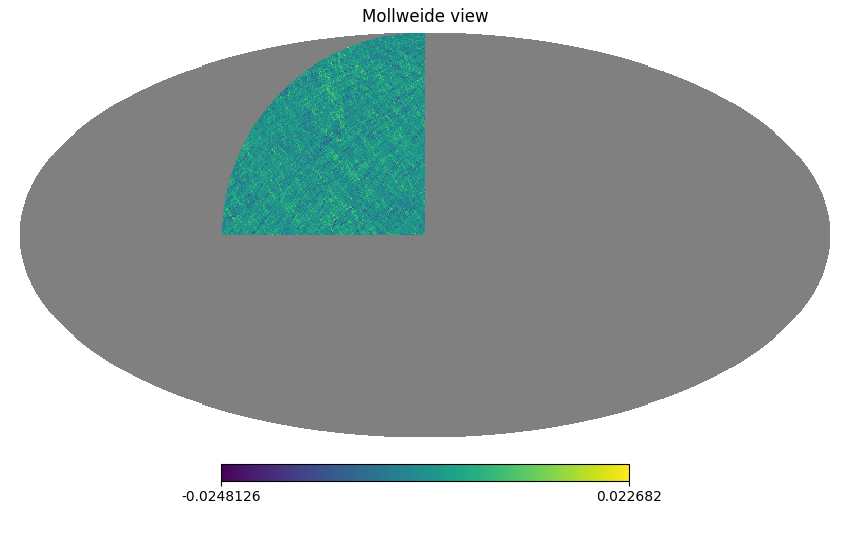

In [15]:
hp.mollview(healpix_mapa_df['_c3'].values, nest=True)

In [ ]:
# hp.write_map (partial)